# Determining the potability of water 

## Importing libraries and dataset



In [ ]:
#dataset link 
#https://www.kaggle.com/adityakadiwal/water-potability?select=water_potability.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm_notebook

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#data=pd.read_csv("/content/drive/MyDrive/MLDM_Case_Study_Milestone-1/water_potability.csv")
data=pd.read_csv("/content/drive/MyDrive/7th_sem/Machine-learning-and-data-mining/Lab/case study/water_potability.csv")

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploring the dataset 

In [ ]:
data.shape

(3276, 10)

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Data preprocessing ( Filling missing data )

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Sulfate            781
ph                 491
Trihalomethanes    162
Potability           0
Turbidity            0
Organic_carbon       0
Conductivity         0
Chloramines          0
Solids               0
Hardness             0
dtype: int64

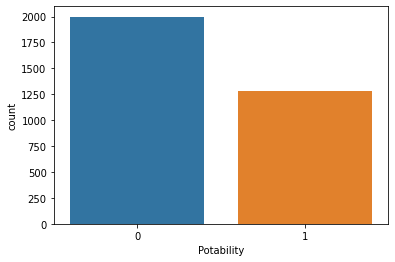

In [ ]:
sns.countplot(x='Potability', data=data)

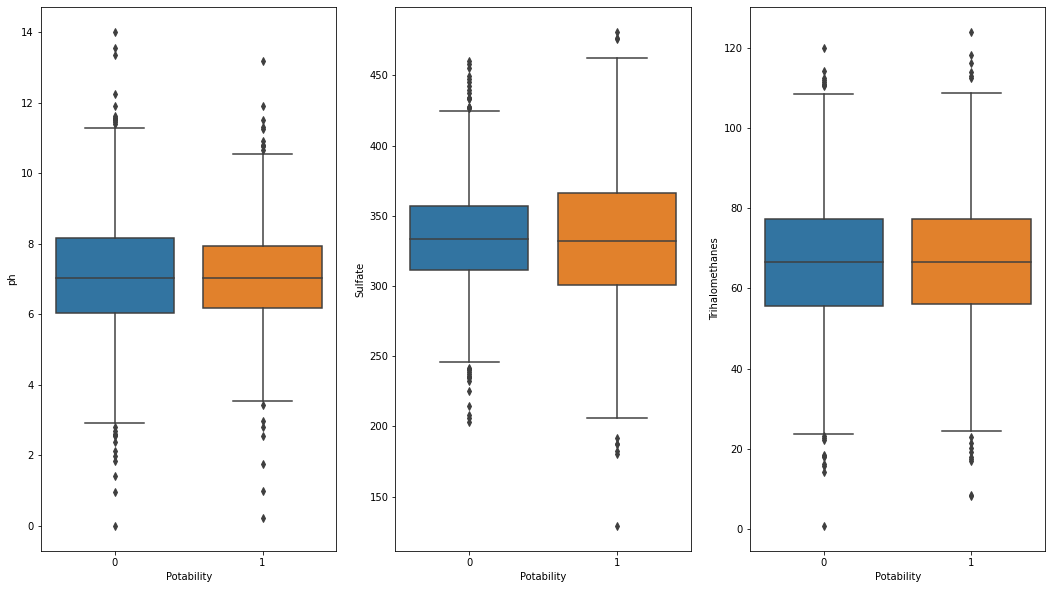

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0], data=data, x='Potability', y='ph')
sns.boxplot(ax=axes[1], data=data, x='Potability', y='Sulfate')
sns.boxplot(ax=axes[2], data=data, x='Potability', y='Trihalomethanes')

In [ ]:
#From the box plot we can see that the data is skewed.

#When the data is skewed, it is good to consider using median 
#value for replacing the missing values.

In [5]:
df = data.copy()
df['ph'] = data['ph'].fillna(data['ph'].median())
df['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].median())
df['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].median())

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## EDA

In [ ]:
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [ ]:
#mean 
#median 
#mode
#quantiles
#std 
for i in cols:
  print(i,":",round(df[i].mean(),2))

ph : 7.07
Hardness : 196.37
Solids : 22014.09
Chloramines : 7.12
Sulfate : 333.61
Conductivity : 426.21
Organic_carbon : 14.28
Trihalomethanes : 66.41
Turbidity : 3.97


In [ ]:
for i in cols:
  print(i,":",round(df[i].median(),2))

ph : 7.04
Hardness : 196.97
Solids : 20927.83
Chloramines : 7.13
Sulfate : 333.07
Conductivity : 421.88
Organic_carbon : 14.22
Trihalomethanes : 66.62
Turbidity : 3.96


In [ ]:
for i in cols:
  print(i,":",round(df[i].std(),2))

ph : 1.47
Hardness : 32.88
Solids : 8768.57
Chloramines : 1.58
Sulfate : 36.14
Conductivity : 80.82
Organic_carbon : 3.31
Trihalomethanes : 15.77
Turbidity : 0.78


In [ ]:
for i in cols:
  print(i,":",df[i].quantile([.25, .5,.75]))
  print()

ph : 0.25    6.277673
0.50    7.036752
0.75    7.870050
Name: ph, dtype: float64

Hardness : 0.25    176.850538
0.50    196.967627
0.75    216.667456
Name: Hardness, dtype: float64

Solids : 0.25    15666.690297
0.50    20927.833607
0.75    27332.762127
Name: Solids, dtype: float64

Chloramines : 0.25    6.127421
0.50    7.130299
0.75    8.114887
Name: Chloramines, dtype: float64

Sulfate : 0.25    317.094638
0.50    333.073546
0.75    350.385756
Name: Sulfate, dtype: float64

Conductivity : 0.25    365.734414
0.50    421.884968
0.75    481.792304
Name: Conductivity, dtype: float64

Organic_carbon : 0.25    12.065801
0.50    14.218338
0.75    16.557652
Name: Organic_carbon, dtype: float64

Trihalomethanes : 0.25    56.647656
0.50    66.622485
0.75    76.666609
Name: Trihalomethanes, dtype: float64

Turbidity : 0.25    3.439711
0.50    3.955028
0.75    4.500320
Name: Turbidity, dtype: float64



In [ ]:
for i in cols:
  print(i,":",round(df[i].min(),2))

ph : 0.0
Hardness : 47.43
Solids : 320.94
Chloramines : 0.35
Sulfate : 129.0
Conductivity : 181.48
Organic_carbon : 2.2
Trihalomethanes : 0.74
Turbidity : 1.45


In [ ]:
for i in cols:
  print(i,":",round(df[i].max(),2))

ph : 14.0
Hardness : 323.12
Solids : 61227.2
Chloramines : 13.13
Sulfate : 481.03
Conductivity : 753.34
Organic_carbon : 28.3
Trihalomethanes : 124.0
Turbidity : 6.74


## Correlation 

In [ ]:
X = df.drop(['Potability'], axis=1)
y = df['Potability']

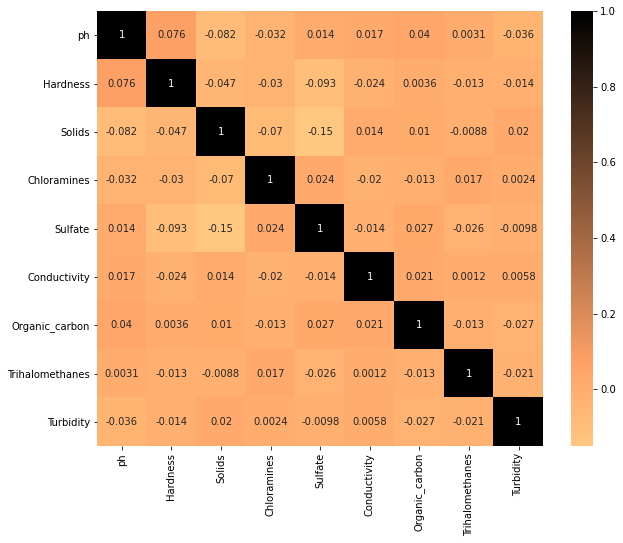

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='copper_r')

## Visualization 

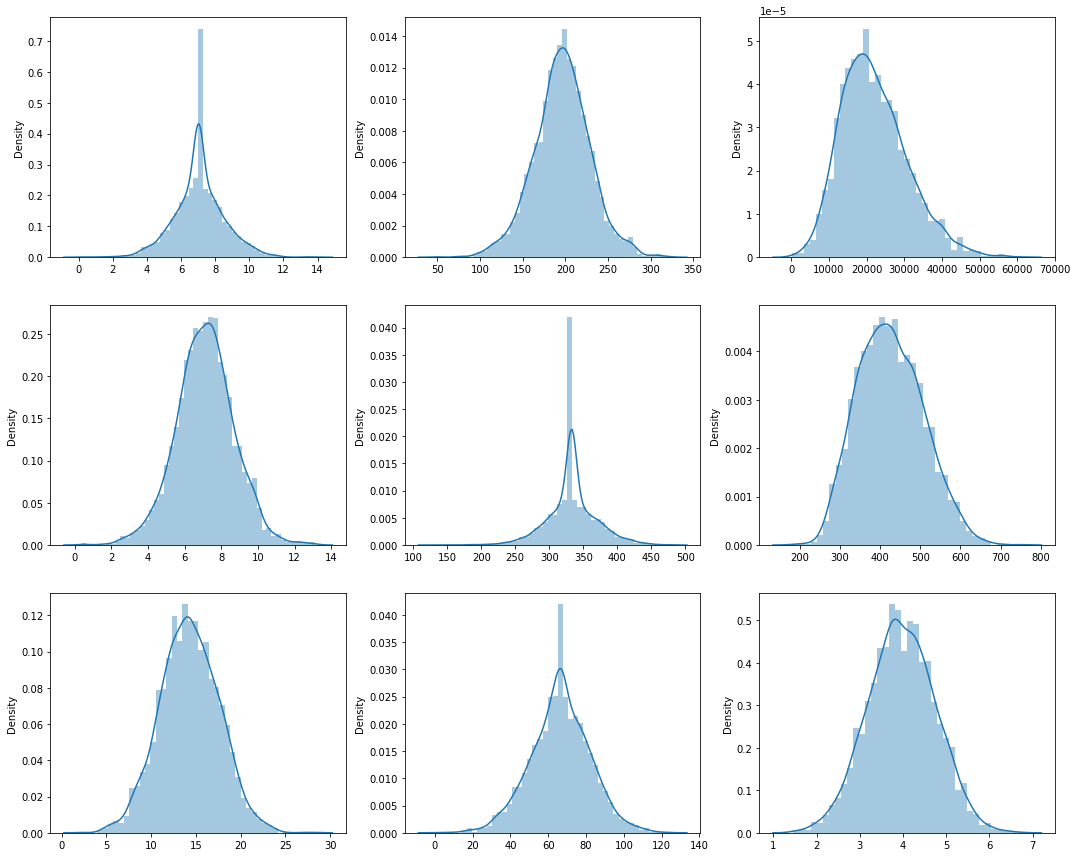

In [ ]:
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
sns.distplot(ax=axes[0, 0], x=df['ph'])
sns.distplot(ax=axes[0, 1], x=df['Hardness'])
sns.distplot(ax=axes[0, 2], x=df['Solids'])
sns.distplot(ax=axes[1, 0], x=df['Chloramines'])
sns.distplot(ax=axes[1, 1], x=df['Sulfate'])
sns.distplot(ax=axes[1, 2], x=df['Conductivity'])
sns.distplot(ax=axes[2, 0], x=df['Organic_carbon'])
sns.distplot(ax=axes[2, 1], x=df['Trihalomethanes'])
sns.distplot(ax=axes[2, 2], x=df['Turbidity'])

In [ ]:
sns.pairplot(data, hue='Potability')

Output hidden; open in https://colab.research.google.com to view.

Your Charts are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

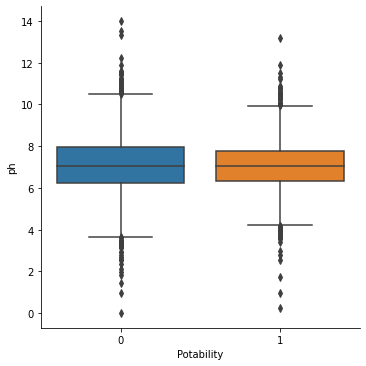

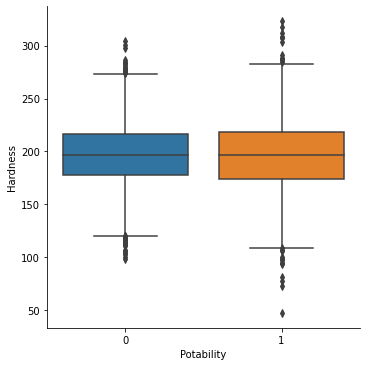

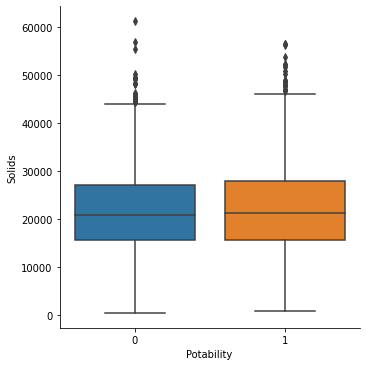

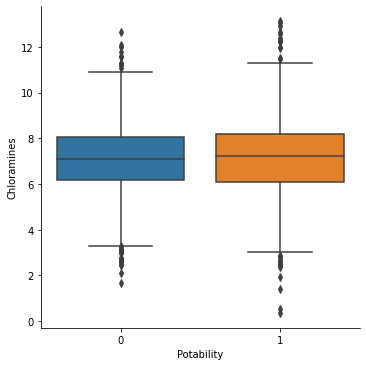

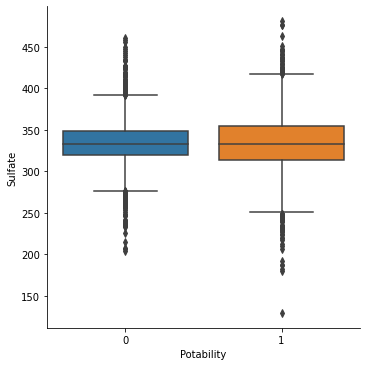

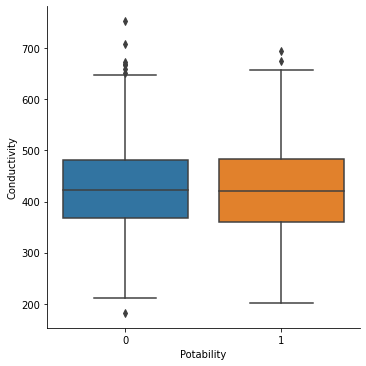

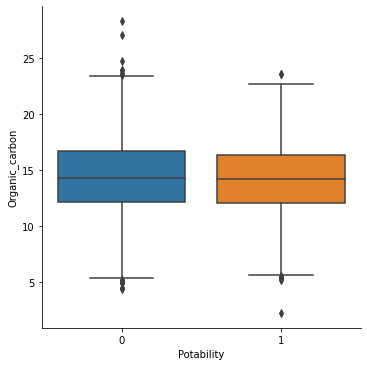

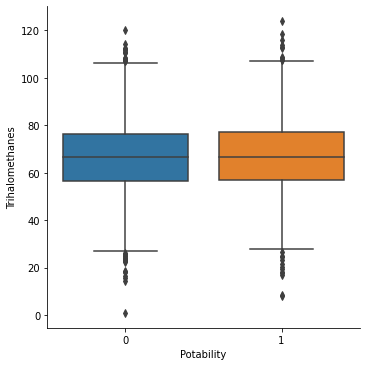

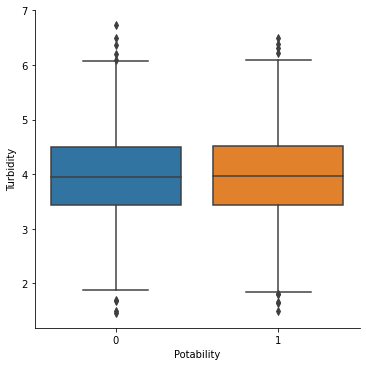

In [ ]:
def boxPlotter(dataset, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    sns.catplot(x="Potability", y=columnName, data=df, kind="box");
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
    boxPlotter(df, column)

In [ ]:
def pieChartPlotter(dataset, columnName):
    """
    Creates pie chart of the column given as parameter in the dataset
    """
    values = dataset[columnName].value_counts()
    labels = dataset[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,explode=[0.06]*dataset[columnName].unique()
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

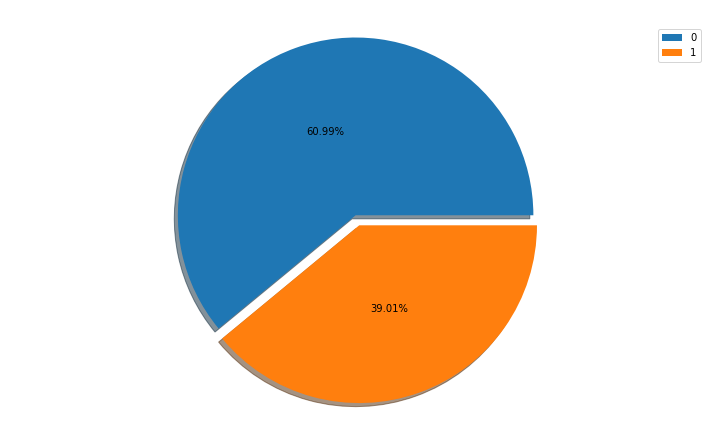

In [ ]:
pieChartPlotter(df, 'Potability') 

In [ ]:
# Cross Validation between Decision Trees, Support vector Machines, Random Forest.

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
import pandas as pd

cols_to_use = ['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes','Turbidity']
X = df[cols_to_use]
y = df.Potability

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_pipeline = make_pipeline(Imputer, RandomForestRegressor())

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-0.43027439 -0.47377099 -0.4379542  -0.45673282 -0.45044275]


In [ ]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 0.449835


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_pipeline = make_pipeline(Imputer, DecisionTreeRegressor())

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-0.41158537 -0.46870229 -0.43664122 -0.47022901 -0.44580153]


In [ ]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 0.446592


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#Epsilon-Support Vector Regression
my_pipeline = make_pipeline(Imputer, SVR())

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-0.29512944 -0.49108072 -0.38837447 -0.39982576 -0.48837407]


In [ ]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 0.412557


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import numpy as np;
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_pipeline = make_pipeline(Imputer, LogisticRegression())

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-0.3902439  -0.38931298 -0.38931298 -0.39083969 -0.39083969]


In [ ]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 0.390110


# Modelling 

In [ ]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [ ]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from warnings import filterwarnings

filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [ ]:
finalResults

[('RF', 0.6656498840052668),
 ('XGB', 0.6468092033861514),
 ('GNB', 0.6095984835429951),
 ('DTC', 0.5721895883880305),
 ('ADA', 0.5600032379487594),
 ('KNN', 0.5418293965225881),
 ('SGDC', 0.5194876867062297),
 ('NC', 0.5083743800673675),
 ('NuSVC', 0.47247107596573323),
 ('Perc', 0.31754341164453526),
 ('LR', 0.30671414038657174),
 ('SVC', 0.30671414038657174),
 ('Ridge', 0.30671414038657174),
 ('BNB', 0.30671414038657174),
 ('PAC', 0.30671414038657174)]

In [ ]:
model_params = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=20)
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

,Model,Parameters,Score
0,XGB,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.666362
1,Random Forest,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.663765


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
param=data['Parameters']
model = VotingClassifier(estimators=[
                                     ('XGB',GradientBoostingClassifier(**param[0])),
                                     ('RF',RandomForestClassifier(**param[1])),
                                    ],voting='hard')

accuracy=[]
scaler = StandardScaler()
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    score=accuracy_score(y_test,predictions)
    accuracy.append(score) 

In [ ]:
np.max(accuracy)

0.6717557251908397

# Conclusion 

1) The TDS levels seem to contain some descripency since its values are on an average 40 folds more than the upper limit for safe drinking water.

2) The data contains almost equal number of acidic and basic pH level water samples.

3) 92% of the data was considered Hard.

4) Only 2% of the water samples were safe in terms of Chloramines levels.

5) Only 1.8% of the water samples were safe in terms of Sulfate levels.

6) 90.6% of the water samples had higher Carbon levels than the typical Carbon levels in drinking water (10 ppm).

7) 76.6% of water samples were safe for drinking in terms of Trihalomethane levels in water.

8) 90.4% of the water samples were safe for drinking in terms of the Turbidity of water samples.

9) The correlation coefficients between the features were very low.

10) Random Forest and XGBoost worked the best to train the model.

11) The ensemble method of using the Voting Classfier on Stratified K-folded samples gave an accuracy of >64%

# Heirarchical clustering 

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In [6]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df.drop('Potability',
  axis='columns', inplace=True)

In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

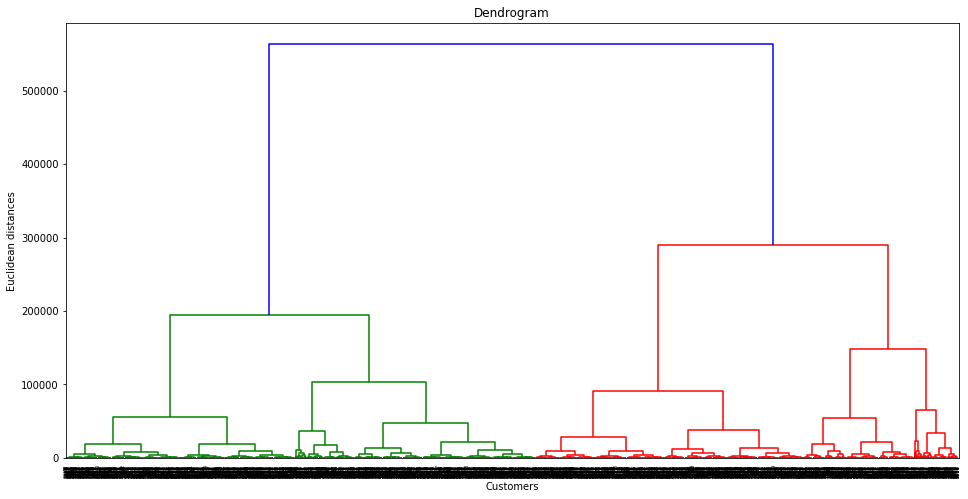

In [10]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [11]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

array([1, 1, 1, ..., 0, 2, 1])

In [12]:
df['cluster'] = pd.DataFrame(y_hc)

In [13]:
trace1 = go.Scatter3d(
    x= df['ph'],
    y= df['Hardness'],
    z= df['Solids'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'ph'),
            yaxis = dict(title  ="Hardness"),
            zaxis = dict(title  = 'Solids')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# DB scan 

We are going to use the DBSCAN for algorithm for the purpose of clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density. It automatically predicts the outliers and removes it. It is better than hierarchical and k-means clustering algorithm. It makes the clusters based on the parameters like epsilon,min points and noise.It separately predicts the core points, border points and outliers efficiently.

In [14]:
x=df.iloc[:,[2,3]].values

In [15]:
x.shape

(3276, 2)

In [16]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [17]:
model=db.fit(x)

In [18]:
label=model.labels_

In [19]:
label

array([-1, -1, -1, ..., -1, -1, -1])

In [20]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 19


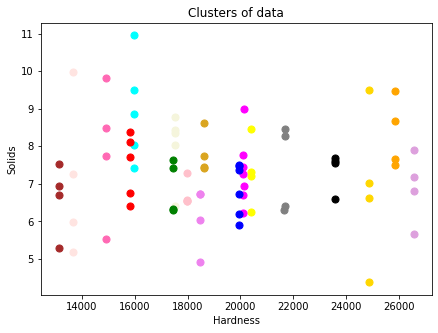

In [23]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.scatter(x[y_means == 9, 0], x[y_means == 9, 1], s = 50, c = 'beige')
plt.scatter(x[y_means == 10, 0], x[y_means == 10, 1], s = 50, c = 'green')
plt.scatter(x[y_means == 11, 0], x[y_means == 11, 1], s = 50, c = 'brown')
plt.scatter(x[y_means == 12, 0], x[y_means == 12, 1], s = 50, c = 'gray')
plt.scatter(x[y_means == 13, 0], x[y_means == 13, 1], s = 50, c = 'goldenrod')
plt.scatter(x[y_means == 14, 0], x[y_means == 14, 1], s = 50, c = 'gold')
plt.scatter(x[y_means == 15, 0], x[y_means == 15, 1], s = 50, c = 'mistyrose')
plt.scatter(x[y_means == 16, 0], x[y_means == 16, 1], s = 50, c = 'hotpink')
plt.scatter(x[y_means == 17, 0], x[y_means == 17, 1], s = 50, c = 'plum')
#plt.scatter(x[y_means == 18, 0], x[y_means == 18, 1], s = 50, c = 'honeydue')
plt.xlabel('Hardness')
plt.ylabel('Solids')
plt.title('Clusters of data')
plt.show()